# KMeans

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score



Ucitavanje podataka

In [2]:
data = pd.read_csv('/home/user/Desktop/IP/sredjeni_podaci.csv')


In [3]:
data

,Unnamed: 0,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1.0,0,21.0,27.0,6.0,2,1,3,0,...,0,1,7.0,6.0,1,1,0.0,1,0,0
1,1,1.0,0,21.0,22.0,1.0,0,1,3,0,...,0,1,7.0,5.0,1,1,1.0,1,0,0
2,2,1.0,0,21.0,22.0,1.0,0,1,1,1,...,0,1,7.0,5.0,1,0,1.0,1,1,1
3,3,1.0,0,21.0,23.0,2.0,1,1,3,0,...,0,1,7.0,6.0,1,1,0.0,1,1,1
4,4,1.0,0,21.0,24.0,3.0,1,1,4,0,...,0,1,6.0,6.0,1,1,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8373,21.0,1,25.0,26.0,1.0,0,3,4,0,...,0,1,2.0,5.0,0,1,0.0,0,1,0
8374,8374,21.0,1,25.0,24.0,1.0,0,3,5,0,...,0,1,4.0,4.0,0,0,0.0,0,0,0
8375,8375,21.0,1,25.0,29.0,4.0,2,3,4,0,...,0,1,6.0,5.0,1,1,0.0,0,0,0
8376,8376,21.0,1,25.0,22.0,3.0,1,3,1,0,...,0,1,5.0,5.0,0,1,0.0,0,1,0


In [4]:
data.drop('Unnamed: 0',axis =1,inplace= True)
X = data.drop('match',axis= 1)

In [5]:
feature_names = X.columns

# Standardizacija podataka

In [6]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)

# Izbor optimalanog broja klastera:

In [7]:
sse = []
silh = []

ks = [i for i in range(2, 10)]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silh.append(silhouette_score(X, kmeans.labels_))



Za izbor optimalnog broja klastera prvo cemo posmatrati kako se sse menjamo za vreme promene broja klastera, medjutim to nije bas najbolja mera za izbor broja klastera zato sto se sse smanjuje sa povecanjem broja klastera.

Text(0, 0.5, 'SSE')

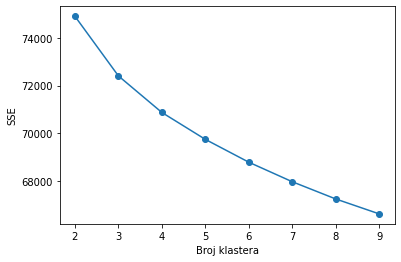

In [8]:
plt.plot(ks, sse,marker = 'o')
plt.xlabel('Broj klastera')
plt.ylabel('SSE')

Pomatramo promenu Silhouette

Text(0, 0.5, 'Silhouette')

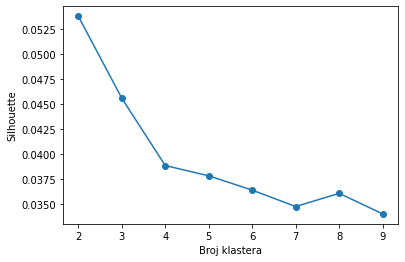

In [9]:
plt.plot(ks, silh,marker = 'o')
plt.xlabel('Broj klastera')
plt.ylabel('Silhouette')

Na osnovu pravila lakta zakljucujemo da je optimalan broj klastera 4.

In [10]:

km = KMeans(n_clusters=4, n_init= 'auto') 
km.fit(X)



KMeans(n_clusters=4, n_init='auto')

# PCA algoritam za smanjenje dimenzionalnosti, samo radi vizuelizacije

In [11]:
X= data.drop('match',axis=1)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
pca = PCA()
X = pca.fit_transform(X)


In [12]:
pca.explained_variance_ratio_[0:2].sum()

0.1519657016955636

Sa 2 komponente smo objasnili samo 15% udela ukupne varijanse.

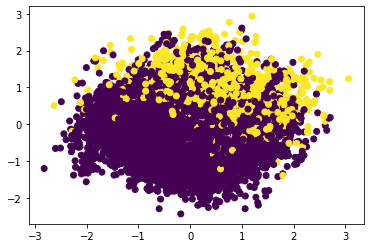

In [13]:
Y = data['match']
s = plt.scatter(X[:, 0], X[:, 1], c=Y)

# Izbor otimalnog broja klastera:


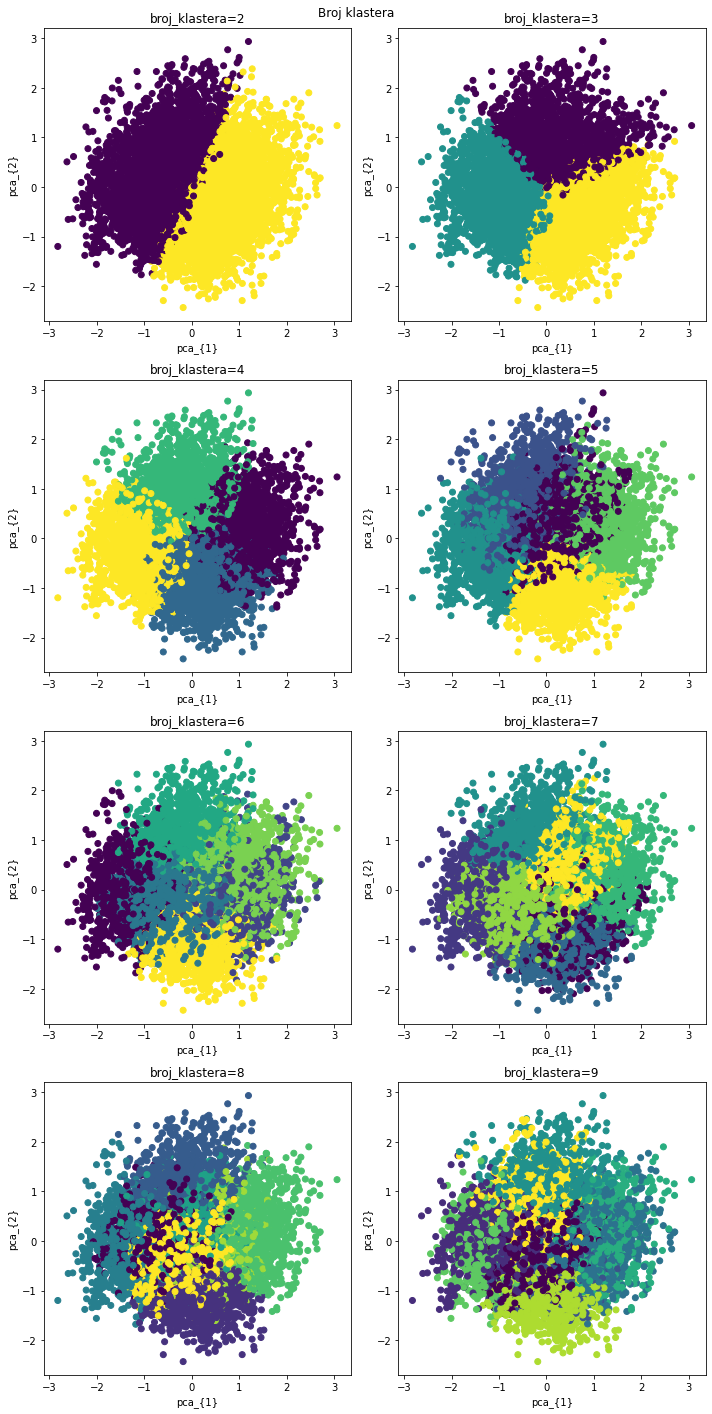

In [14]:
ks = [i for i in range(2, 10)]
sse = []
silh = []
fig, axs = plt.subplots(4, 2, figsize=(10, 20))
fig.suptitle("Broj klastera")

for k, ax in zip(ks, axs.flatten()):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)

    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    ax.set_title(f"broj_klastera={k}")
    ax.set_xlabel("pca_{1}")
    ax.set_ylabel("pca_{2}")

    sse.append(kmeans.inertia_)
    silh.append(silhouette_score(X, kmeans.labels_))

plt.tight_layout()
plt.show()





Text(0, 0.5, 'SSE')

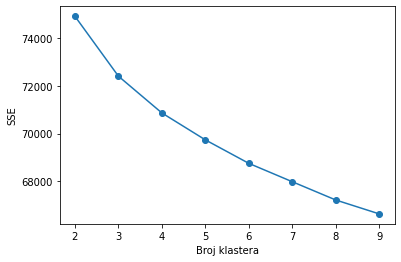

In [15]:
plt.plot(ks, sse,marker = 'o')
plt.xlabel('Broj klastera')
plt.ylabel('SSE')



Sada posmatrama promenu Silhouette

Text(0, 0.5, 'Silhouette')

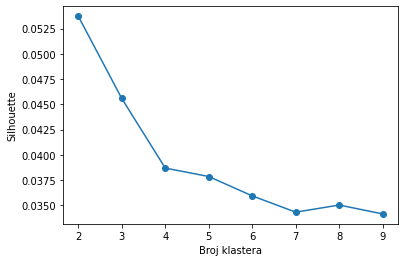

In [16]:
plt.plot(ks, silh,marker = 'o')
plt.xlabel('Broj klastera')
plt.ylabel('Silhouette')

Na osnovu pravila lakta zakljucujem da je optimalan broj klastera 4

In [17]:


km = KMeans(n_clusters=4, n_init= 'auto') 
km.fit(X)



KMeans(n_clusters=4, n_init='auto')

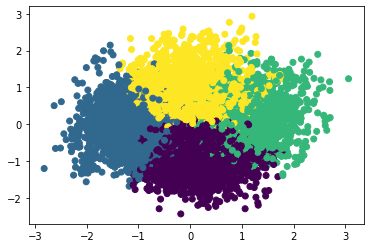

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)